<h1 style="color: #006400;"> Data Visualization </h1>
<h3 style="color: #8b5e3c;">Visualizing relationships between features using the ALSL and AccountLevel dataset</h3>

<p style="color: #8b5e3c;">Mathias Galvan</p>

<h2 style="color: #006400;"> Loading the Data </h2>

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


acc_seat = pd.read_csv('/Users/galvanm/python/BucksHackathon25/BucksBusinessObjectives/BucksDatasets/ALSL.csv')
acc = pd.read_csv('/Users/galvanm/python/BucksHackathon25/BucksBusinessObjectives/BucksDatasets/AccountLevel.csv')
seat = pd.read_csv('/Users/galvanm/python/BucksHackathon25/BucksBusinessObjectives/BucksDatasets/SeatLevel.csv')

merge2 = pd.merge(seat, acc, how='outer', on='AccountNumber')
print(merge2.iloc[113648])

merge = pd.merge(seat, acc, how='left', on='AccountNumber')

merge1 = pd.merge(seat, acc, how='right', on='AccountNumber')
print(merge1.iloc[113648])

print()
print(merge.iloc[113648])

print()
print(seat.iloc[113648])
#acc_seat.head()
print()
acc_seat.iloc[113648]

Season_x                                        2023
AccountNumber                                  11388
Game                     2024-01-14 Sacramento Kings
GameDate                                  2024-01-14
GameTier                                           C
Season_y                                        2023
SingleGameTickets                                  3
PartialPlanTickets                                 0
GroupTickets                                       0
STM                                                0
AvgSpend                                        64.0
GamesAttended                                      1
FanSegment                              Limited Data
DistanceToArena                                  3.0
BasketballPropensity                           466.0
SocialMediaEngagement                         Medium
Name: 113648, dtype: object
Season_x                                          2023
AccountNumber                                        2
Game          

Season_x                                          2024
AccountNumber                                        2
SingleGameTickets                                    2
PartialPlanTickets                                   0
GroupTickets                                         0
STM                                                  0
AvgSpend                                          95.0
GamesAttended                                        0
FanSegment                                           A
DistanceToArena                                   47.0
BasketballPropensity                             916.0
SocialMediaEngagement                             High
Season_y                                          2023
Game                     2024-03-26 Los Angeles Lakers
GameDate                                    2024-03-26
GameTier                                             A
Name: 113648, dtype: object

<h2 style="color: #006400;"> FanSegment v GameTier</h2>


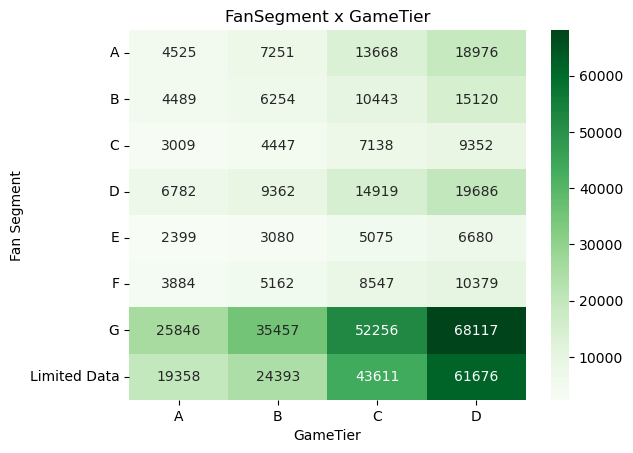

In [71]:
ct = pd.crosstab(acc_seat['FanSegment'], acc_seat['GameTier'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Greens')
plt.title('FanSegment x GameTier')
plt.xlabel('GameTier')
plt.ylabel('Fan Segment')
plt.show()

<h2 style="color: #006400;"> SocialMediaEngagement v GameTier</h2>

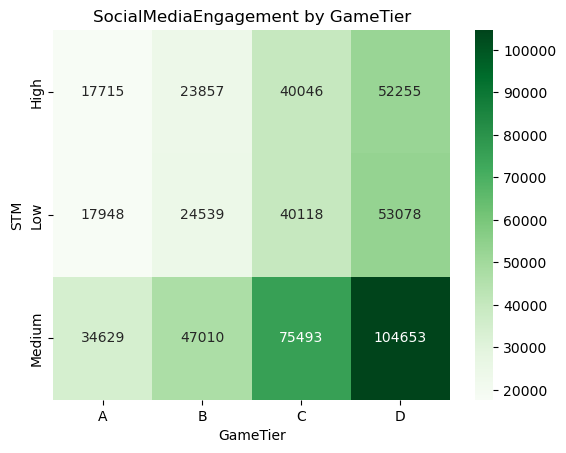

In [44]:
ct = pd.crosstab(acc_seat['SocialMediaEngagement'], acc_seat['GameTier'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Greens')
plt.title('SocialMediaEngagement by GameTier')
plt.xlabel('GameTier')
plt.ylabel('STM')
plt.show()

<h2 style="color: #006400;"> TicketPlans vs GameTier</h2>

In [100]:



def assign_ticket_flags(df : pd.DataFrame) -> pd.DataFrame:
    # pull the three totals
    n_group   = int(df['GroupTickets'].iloc[0])
    n_partial = int(df['PartialPlanTickets'].iloc[0])
    n_single  = int(df['SingleGameTickets'].iloc[0])
    total     = n_group + n_partial + n_single 
    index = 0

    for i in range(n_group):
        df.at[index, 'GroupTickets'] = 1
        index = index + 1

    for i in range(n_partial):
        df.at[index, 'PartialPlanTickets'] = 1
        index = index + 1
            
    for i in range(n_single):
        df.at[index, 'SingleGameTickets'] = 1
        index = index + 1
    return df

# 4) Apply it to each account
spread = (acc_seat.groupby('AccountNumber',axis=0, group_keys=False).apply(assign_ticket_flags))

C:\Users\galvanm\AppData\Local\Temp\ipykernel_46208\4214045037.py:23: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  spread = (acc_seat.groupby('AccountNumber',axis=0, group_keys=False).apply(assign_ticket_flags))
C:\Users\galvanm\AppData\Local\Temp\ipykernel_46208\4214045037.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  spread = (acc_seat.groupby('AccountNumber',axis=0, group_keys=False).apply(assign_ticket_flags))


<SeasonTicketMember vs GameTier

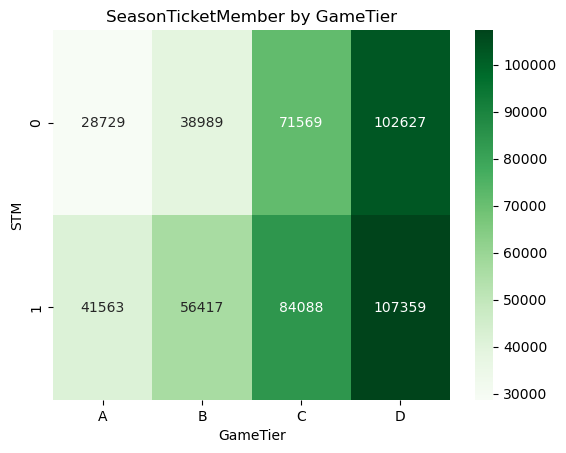

In [86]:
ct = pd.crosstab(acc_seat['STM'], acc_seat['GameTier'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Greens')
plt.title('SeasonTicketMember by GameTier')
plt.xlabel('GameTier')
plt.ylabel('STM')
plt.show()

<h2 style="color: #006400;">DistanceToArena v GameTier</h2>

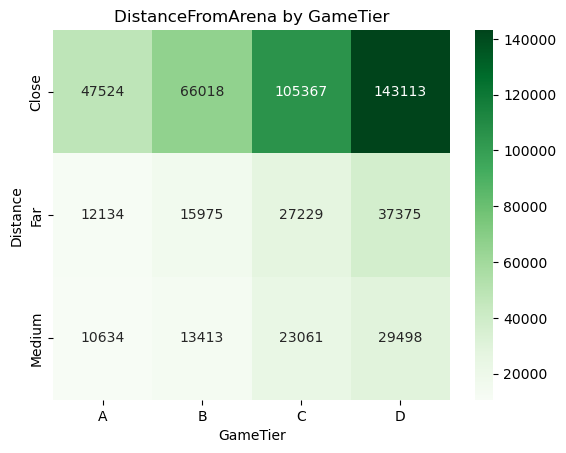

In [84]:
def distance_label(x):
    if x >= 80:
        return 'Far'
    elif x >= 40:
        return 'Medium'
    else:
        return 'Close'

acc_seat['DistanceToArenaLabel'] = acc_seat['DistanceToArena'].apply(distance_label)

ct = pd.crosstab(acc_seat['DistanceToArenaLabel'], acc_seat['GameTier'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Greens')
plt.title('DistanceFromArena by GameTier')
plt.xlabel('GameTier')
plt.ylabel('Distance')
plt.show()

<h2 style="color: #006400;">BasketballPropensity v GameTier</h2>

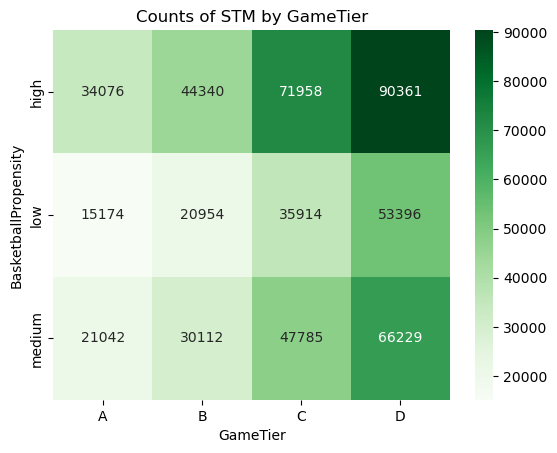

In [82]:
def propensity_label(x):
    if x >= 800:
        return 'high'
    elif x >= 400:
        return 'medium'
    else:
        return 'low'

acc_seat['BasketballPropensityLabel'] = acc_seat['BasketballPropensity'].apply(propensity_label)

ct = pd.crosstab(acc_seat['BasketballPropensityLabel'], acc_seat['GameTier'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Greens')
plt.title('Counts of STM by GameTier')
plt.xlabel('GameTier')
plt.ylabel('BasketballPropensity')
plt.show()

<h2 style="color: #006400;">FanSegment v GamesAttended</h2>

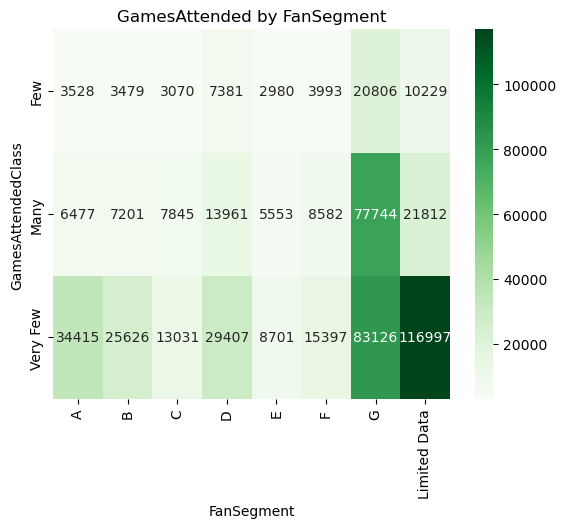

In [80]:
def games_attended_label(x):
    if x >= 5:
        return 'Many'
    elif x >= 3:
        return 'Few'
    else:
        return 'Very Few'

acc_seat['GamesAttendedClass'] = acc_seat['GamesAttended'].apply(games_attended_label)

ct = pd.crosstab(acc_seat['GamesAttendedClass'], acc_seat['FanSegment'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Greens')
plt.title('GamesAttended by FanSegment')
plt.xlabel('FanSegment')
plt.ylabel('GamesAttendedClass')
plt.show()